# ML 1

In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = [
        (10, 95),
        (9, 80),
        (2, 10),
        (15, 50),
        (10, 45),
        (16, 98),
        (11, 38),
        (16, 93),
]
X = [pt[0] for pt in data]
Y = [pt[1] for pt in data]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


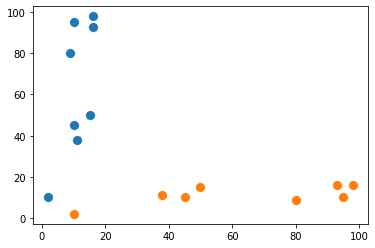

In [5]:
sns.scatterplot(X, Y, s=100)
sns.scatterplot(Y, X, s=100)

In [6]:
xx = [a*a for a in X]
xy = [X[i] * Y[i] for i in range(len(X))]

In [9]:
sum_x = np.sum(X)
sum_y = np.sum(Y)
sum_xx = np.sum(xx)
sum_xy = np.sum(xy)

In [11]:
m = (len(X) * sum_xy - sum_x * sum_y)/(len(X) * sum_xx - sum_x * sum_x)

In [13]:
b = (sum_y - m * sum_x)/len(X)

In [15]:
print(f'Linear equation: y = {round(m, 2)} * x + {round(b, 2)}')

Linear equation: y = 4.59 * x + 12.58


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


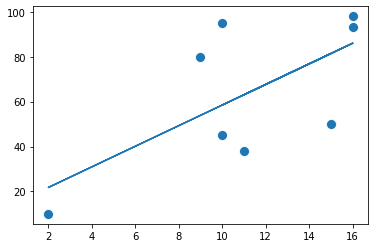

In [19]:
sns.scatterplot(X, Y, s=100)
x_val = np.array(X)
y_val = b + x_val*m
plt.plot(X, y_val)

# ML 2

# ML 3

In [24]:
import numpy as np

In [47]:
class KNN:
  def __init__(self, k):
    self.k = k
    self.X = []
    self.y = []
  
  def fit(self, X, y):
    self.X = self.X + X
    self.y = self.y + y

  def __distance(self, x, y):
    return (x[0] - y[0])**2 + (x[1] - y[1])**2
  
  def __get_class(self, X):
    distances = []
    for i in range(len(self.X)):
      distances.append((self.__distance(X, self.X[i]), self.y[i]))
    distances.sort()
    distances = distances[:self.k]
    count = {}
    for d in distances:
      try: count[d[1]] += 1
      except: count[d[1]] = 1

    print(distances)
    return max(count, key = lambda i: count[i])

  def predict(self, X):
    preds = []
    for x in X:
      preds.append(self.__get_class(x))
    return preds


  def __get_weighted_class(self, X):
    distances = []
    for i in range(len(self.X)):
      distances.append((self.__distance(X, self.X[i]), self.y[i]))
    distances.sort()
    distances = distances[:self.k]
    count = {}
    for d in distances:
      try: count[d[1]] += 1/d[0]
      except: count[d[1]] = 1/d[0]

    print(distances)
    return max(count, key = lambda i: count[i])
    
  def predict_weighted(self, X):
    preds = []
    for x in X:
      preds.append(self.__get_weighted_class(x))
    return preds


  def __get_locally_weighted_class(self, X):
    distances = []
    for i in range(len(self.X)):
      distances.append((self.__distance(X, self.X[i]), self.y[i]))
    distances.sort()
    distances = distances[:self.k]
    count = {}
    for d in distances:
      try: count[d[1]].append(1/d[0])
      except: count[d[1]] = [1/d[0]]
    for c in count:
      count[c] = np.mean(count[c])
      
    print(distances)
    return max(count, key = lambda i: count[i])
    
  def predict_locally_weighted(self, X):
    preds = []
    for x in X:
      preds.append(self.__get_locally_weighted_class(x))
    return preds

In [48]:
X = [
     (2, 4),
     (4, 6),
     (4, 4),
     (4, 2),
     (6, 4),
     (6 ,2)
]
y = ['Y', 'Y', 'B', 'Y', 'Y', 'B']
model = KNN(3)
model.fit(X, y)
print(f'Standard k-NN: {model.predict([(6, 6)])}')

[(4, 'Y'), (4, 'Y'), (8, 'B')]
Standard k-NN: ['Y']


In [49]:
print(f'Standard k-NN: {model.predict_weighted([(6, 6)])}')

[(4, 'Y'), (4, 'Y'), (8, 'B')]
Standard k-NN: ['Y']


In [50]:
print(f'Standard k-NN: {model.predict_locally_weighted([(6, 6)])}')

[(4, 'Y'), (4, 'Y'), (8, 'B')]
Standard k-NN: ['Y']


# ML 4

In [51]:
import pandas as pd
import seaborn as sns

In [65]:
class Kmeans:
  def __init__(self, k):
    self.k = k

  def __distance(self, x, y):
    return (x[0] - y[0])**2 + (x[1] - y[1])**2

  def fit(self, points, centroids):
    prev_clusters = None
    clusters = [set() for _ in range(self.k)]
    while prev_clusters != clusters:
      prev_clusters = clusters
      for p in points:
        idx = 0
        for i in range(1, self.k):
          if self.__distance(p, centroids[i]) < self.__distance(p, centroids[idx]):
            idx = i
        clusters[idx].add(p)
      for i in range(self.k):
        centroids[i] = np.mean(list(clusters[i]), axis = 0)

    return clusters, centroids 


In [55]:
points = [
          (0.1, 0.6),
          (0.15, 0.71),
          (0.08,0.9),
          (0.16, 0.85),
          (0.2,0.3),
          (0.25,0.5),
          (0.24,0.1),
          (0.3,0.2)
]
raw_df = pd.DataFrame()
x = [pt[0] for pt in points]
y = [pt[1] for pt in points]
raw_df['x'] = x
raw_df['y'] = y
raw_df

,x,y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30
5,0.25,0.50
6,0.24,0.10
7,0.30,0.20


## BEFORE CLUSTERING

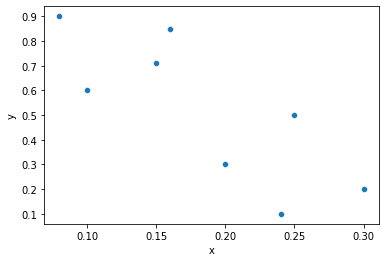

In [56]:
sns.scatterplot(data=raw_df, x='x', y = 'y')

## AFTER CLUSTERING

In [66]:
model = Kmeans(2)

In [67]:
clusters, centroid = model.fit(points, [(0.1, 0.6), (0.3, 0.2)])

In [72]:
clustered_df = pd.DataFrame()
x = []
y = []
category = []
for i in range(len(clusters)):
  for p in clusters[i]:
    x.append(p[0])
    y.append(p[1])
    category.append(f'{i}')
for c in centroid:
  x.append(c[0])
  y.append(c[1])
  category.append('category')
clustered_df['x'] = x
clustered_df['y'] = y
clustered_df['category'] = category
clustered_df

,x,y,category
0,0.080000,0.900,0
1,0.160000,0.850,0
2,0.100000,0.600,0
3,0.150000,0.710,0
4,0.250000,0.500,0
5,0.200000,0.300,1
6,0.240000,0.100,1
7,0.300000,0.200,1
8,0.148000,0.712,category
9,0.246667,0.200,category


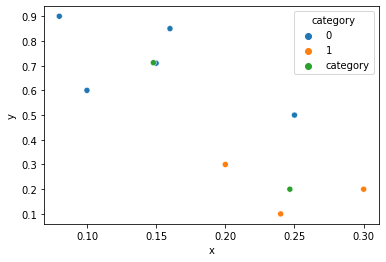

In [74]:
sns.scatterplot(data=clustered_df, x='x', y='y', hue='category')

# ICS 1

In [77]:
P10 = (3, 5, 2, 4, 1, 8, 6, 9, 7, 10)
P8 = (4, 6, 1, 7, 2, 8, 3, 5)
P4 = (3, 1, 4, 2)

IP = (3, 2, 4, 6, 7, 1, 5, 8)
IPi = (4, 7, 8, 1, 3, 5, 2, 6)

E = (4, 1, 2, 3, 2, 3, 4, 1)

s0 =[
     [1, 0, 3, 2],
     [3, 2, 1, 0],
     [0, 2, 1, 3],
     [3, 1, 3, 2]
]

s1 = [
      [0, 1, 2, 3],
      [2, 0, 1, 3],
      [3, 0, 1, 0],
      [2, 1, 0 ,3]
]

In [79]:
def permutation(key, pattern):
  permuted = ''
  for i in pattern:
    permuted += key[i-1]
  return permuted

def sbox(s, x):
  row = int(x[0]+x[3], 2)
  col = int(x[1]+x[2], 2)
  return bin(s[row][col])[2:].zfill(2)

In [86]:
def fk(b, d, key):
  #Expansion transformation
  ext_op = permutation(d, E)
  print(f"Output after expansion: {ext_op}")

  #ExOR with subkey
  xor = bin(int(ext_op, 2) ^ int(key, 2))[2:].zfill(8)
  print("o/p after XOR with key: ", xor)

  #Sbox
  sbox0 = sbox(s0, xor[0:4])
  sbox1 = sbox(s1, xor[4:8])
  print("SBOX0: ", sbox0)
  print("SBOX1: ", sbox1)

  p4 = permutation((sbox0+sbox1), P4)
  print("P4: ", p4)
  ans = bin(int(p4, 2) ^ int(b, 2))[2:].zfill(4)
  print("Again XOR with left: ", ans)
  print("Output after this fk: ", (ans + d),"\n\n")
  return ans


In [82]:
# Take input

plain_text = input("Enter 8 bit plain text: ")
if len(plain_text) != 8:
  raise Exception('check length')
key = input("Please eneter 10 bit key: ")
if len(key)!=10:
  raise Exception("Check if key is of 10 bits: ")

# Please enter 8 bit plain-text: 10101010
# Please enter 10 bit key1010101010

Enter 8 bit plain text: 10101010
Please eneter 10 bit key: 1010101010


In [87]:
# Key generation

p10_op = permutation(key, P10)
l0 = p10_op[0:5]
r0 = p10_op[5:10]

# Shift
l0 = l0[1:] + l0[:1]
r0 = r0[1:] + r0[:1]

#p8
sk_1 = permutation((l0+r0), P8) #subkey 1

# Again shift
l1 = l0[2:] + l0[:2]
r1 = r0[2:] + r0[:2]

sk_2 = permutation((l1+r1), P8) #subkey 2

print("First subkey: ",sk_1)
print("Second subkey: ",sk_2)


First subkey:  10110101
Second subkey:  11001010


In [88]:
ip = permutation(plain_text, IP)

fk1 = fk(ip[0:4], ip[4:8], sk_1)

fk2 = fk(ip[4:8], fk1, sk_2)

# Final permutation
ip_inv = permutation((fk2+fk1), IPi)
print("Final Cipher text: ", ip_inv)

Output after expansion: 01111101
o/p after XOR with key:  11001000
SBOX0:  01
SBOX1:  11
P4:  1011
Again XOR with left:  0011
Output after this fk:  00111110 


Output after expansion: 10010110
o/p after XOR with key:  01011100
SBOX0:  01
SBOX1:  01
P4:  0011
Again XOR with left:  1101
Output after this fk:  11010011 


Final Cipher text:  11110010


# ICS 2

# ICS 3


In [90]:
# Diffie-Hellman Key Exchange

def fpow(a, b, m):
  if b == 0:
    return 1
  r = fpow(a, b//2, m)
  r = (r*r) % m
  if b%2 == 1:
    r = (r*a)%m
  return r

# Global variable
P=23

In [91]:
# Calculating G (primitive root)
G=0
for r in range(1, P, 1):
  s=set()
  for x in range(P-1):
    s.add(fpow(r, x, P))
  if len(s) == P-1:
    G=r
    break
print(G)

5


In [92]:
# Private Key
Ra = 3
Rb = 4

In [93]:
# Public key
Ua = fpow(G, Ra, P)
Ub = fpow(G, Rb, P)

In [94]:
# Symmetric key calculated by A and B
symmetric_key_a = fpow(Ub, Ra, P)
symmetric_key_b = fpow(Ua, Rb, P)
print(symmetric_key_a)

18


In [95]:
assert(symmetric_key_a == symmetric_key_b)

# ICS 4

In [98]:
def gcd(a, b):
  if a==0:
    return b
  return gcd(b % a, a)

def f_pow(a, b, m):
  if b == 0:
    return 1
  r = f_pow(a, b//2, m)
  r = (r*r) % m
  if b%2==1:
    r = (r*a) % m
  
  return r

In [102]:
# Generating Key
P=53
Q=59

n = P*Q
phi_n = (P-1)*(Q-1)

#Generating e
e=2
while e < phi_n:
  if gcd(e, phi_n) == 1:
    break
  e+=1

In [103]:
# Generating d
k=1
while (k*phi_n +1) % e != 0:
  k+=1
d = (k*phi_n+1)//e

In [104]:
U = [e, n]
R = [d, n]

print("Primes:\t\t", P, ",", Q)
print("N:\t\t", n)
print("phi(N):\t\t", phi_n)
print("e:\t\t", e)
print("d:\t\t", d)
print("Public key:\t", "[e, n] =", U)
print("Private key:\t", "[d, n] =", R)

Primes:		 53 , 59
N:		 3127
phi(N):		 3016
e:		 3
d:		 2011
Public key:	 [e, n] = [3, 3127]
Private key:	 [d, n] = [2011, 3127]


In [105]:
# Testing 
def encrypt(P, U):
  e, n = U
  c = f_pow(P, e, n)
  return c

def decrypt(C, R):
  d, n = R
  ret = f_pow(C, d, n)
  return ret

In [106]:
plaintext = 89
c = encrypt(plaintext, U)
p = decrypt(c, R)
assert(p == plaintext)

# ICS 5

In [107]:
P = 11

In [109]:
def modulm(a, b, m = P):
  return ((a % m)* (b % m)) % m

def f__pow(a, b, m=P):
  if b == 0:
     return 1
  r = f__pow(a, b//2, m)
  r = (r*r)%m
  if b%2 == 1:
    r = (r*a)%m
  return r

def moddiv(a, b, m=P):
  return modulm(a, f__pow(b, m-2, m), m)

In [114]:
# CLASSES

class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y
  def __eq__(self, p):
    return self.x == p.x and self.y == p.y

  def __str__(self) -> str:
    return f"({self.x}, {self.y})"

class Elliptic_Curve:
  def __init__(self, a, b):
    self.a = a
    self.b = b
  def add(self, p1, p2, m=P):
    l=0
    if p1==p2:
      num = 3 * p1.x * p1.x + self.a
      den = 2 * p1.y
    else:
      num = p1.y - p2.y
      den = p1.x - p2.x
    l = moddiv(num, den, m)
    x3 = (l*l - p1.x - p2.x) % m
    y3 = (l*(p1.x-x3)- p1.y) % m
    return Point(x3, y3)

  def mul(self, k, p):
    temp = p
    while k != 1:
      temp = self.add(temp, p)
      k -= 1
    return temp

  def sub(self, p1, p2):
    np = Point(p2.x, -p2.y)
    return self.add(p1, np)

In [115]:
curve = Elliptic_Curve(2, 4) # Points lying on this curve:{0, 2}, {0, 5}, {1, 0}, {2, 3}, {2, 4}, {3, 3}, {3, 4}, {6, 1}, {6, 6}
G = Point(0, 2)

In [116]:
def encrypt(p, U):
  k = 5
  c = [
       curve.mul(k, G),
       curve.add(p, curve.mul(k, U))
  ]
  return c

def decrypt(C, R):
  p = curve.sub(C[1], curve.mul(R, C[0]))
  return p

In [117]:
# Testing

R = 5               # Private key
U = curve.mul(R, G) # Public key

In [118]:
plaintext = Point(3, 4)

In [119]:
ciphertext = encrypt(plaintext, U)
p = decrypt(ciphertext, R)

In [120]:
print(p)

(3, 4)


In [121]:
assert(p == plaintext)